# EDA Analysis of Global Suicide Rates dataset:

In [2]:
#Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

# Set visualization style
sns.set(style="whitegrid")


In [3]:
#Loading the dataset
Suicide_data=pd.read_csv("master.csv")

# Display the first few rows
Suicide_data.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
# Display the last few rows
Suicide_data.tail(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27810,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27813,Uzbekistan,2014,male,75+ years,17,224995,7.56,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [5]:
# Check data info
Suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
#Checking for missing values:
Suicide_data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

### Handling the missing Values using KNN Imputation method:
Since the values of that given column has similarties so using knn method is better way to fill the missing values.


In [7]:
#Sample for the KNN Imputation
imputer=KNNImputer(n_neighbors=10)
#Subseting the Column with missing values
Sub_set=Suicide_data[['HDI for year']]

#Imputation fit for the given column
Sub_set_imputed=pd.DataFrame(imputer.fit_transform(Sub_set),columns=Sub_set.columns)

#Replacing the Column with the Imputed One
Suicide_data['HDI for year']=Sub_set_imputed['HDI for year']

#Displaying the head after Imputation
Suicide_data.head()


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers


In [8]:
#Checking for missing Values after Imputation
print(Suicide_data.isnull().sum())

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64


In [9]:
# Convert `age` to a categorical type for easier analysis
Suicide_data['age'] = pd.Categorical(Suicide_data['age'], ordered=True)
Suicide_data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,0.776601,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,0.776601,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,0.776601,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,0.776601,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,0.776601,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675000,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675000,"63,067,077,179",2309,Generation Z


### Exploring the Golobal Average suicide rate Over time 

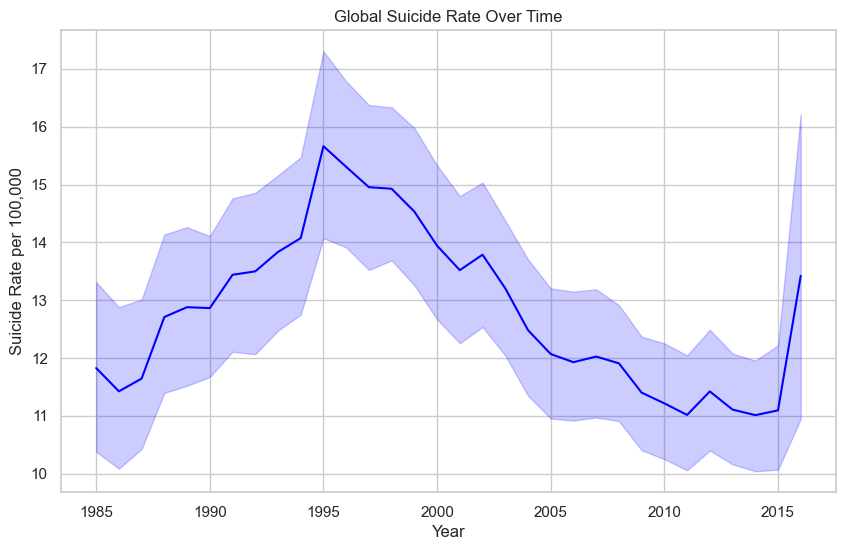

In [10]:
# Average suicide rate over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=Suicide_data, x='year', y='suicides/100k pop', color="blue")
plt.title("Global Suicide Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Suicide Rate per 100,000")
plt.show()



### Explanation of Average global suicide rate:
As we can see from the graph the suicide rate was highly increasing from 1985 to 1995 which has reached maxmimum value. the from 1995 to 2015 the wolrd suicide rate was highly dercreasing and it has shown alittle increament.

### Exloring Suicide rate by Gender:

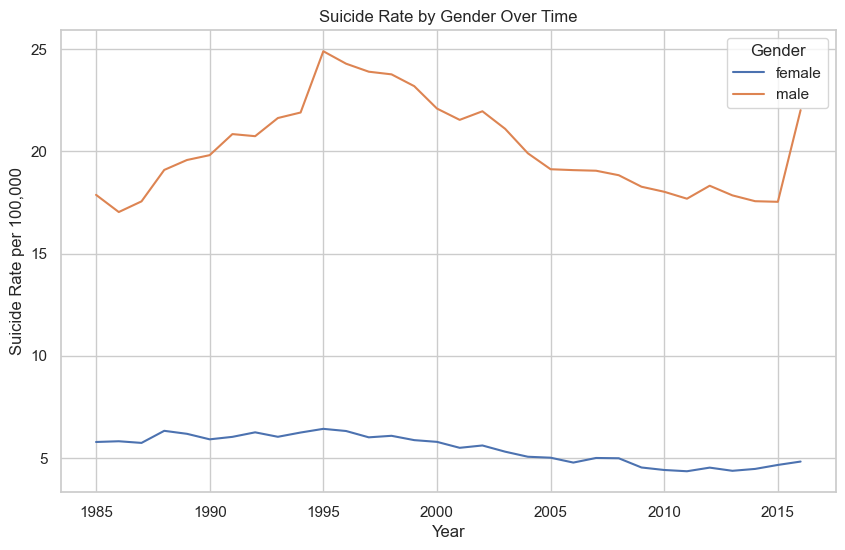

In [11]:
# Suicide rate by gender over time
gender_trend = Suicide_data.groupby(['year', 'sex'])['suicides/100k pop'].mean().reset_index()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=gender_trend, x='year', y='suicides/100k pop', hue='sex')
plt.title("Suicide Rate by Gender Over Time")
plt.xlabel("Year")
plt.ylabel("Suicide Rate per 100,000")
plt.legend(title='Gender')
plt.show()

### Explanation of Gender suicide rate:
The graph clearly shows the avaerage suicide number was highly shown on men which is around 20 than on females which is around 5.That reveals the pscychological understanding of whomens is better than of the younk men.

### Average Suicide rate by Age group:

C:\Users\Admin\AppData\Local\Temp\ipykernel_1292\3795768334.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_trend = Suicide_data.groupby('age')['suicides/100k pop'].mean().reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_1292\3795768334.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_trend, x='age', y='suicides/100k pop', palette="viridis", order=age_order)


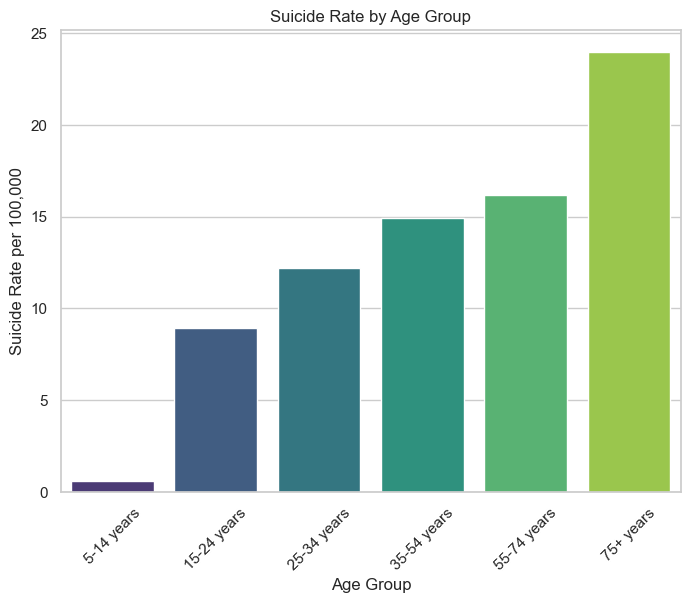

In [12]:
# Suicide rate by age group
age_group_trend = Suicide_data.groupby('age')['suicides/100k pop'].mean().reset_index()

# Sort the data by the 'suicides/100k pop' column in ascending order
age_group_trend = age_group_trend.sort_values(by='suicides/100k pop', ascending=True)

# Extract the sorted age group order
age_order = age_group_trend['age'].tolist()

# Plot the trend with the correct order
plt.figure(figsize=(8, 6))
sns.barplot(data=age_group_trend, x='age', y='suicides/100k pop', palette="viridis", order=age_order)
plt.title("Suicide Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Suicide Rate per 100,000")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


### explanation:
As observed from the graph, as the age increases the Suicide rate also increases that reveals the ealder ages have highest suicide rate, that is the category 75+ years has the highest rate.

### Exploring correlation between variables:

#### Correlation Matrix Interpretation

A correlation matrix is a table that shows the correlation coefficients between different variables in a dataset. The correlation coefficient measures the strength and direction of the linear relationship between two variables.

-1: Strong negative correlation (as one variable increases, the other decreases)  
0: No correlation (no linear relationship)  
+1: Strong positive correlation (as one variable increases, the other also increases)  
Observations from the Matrix


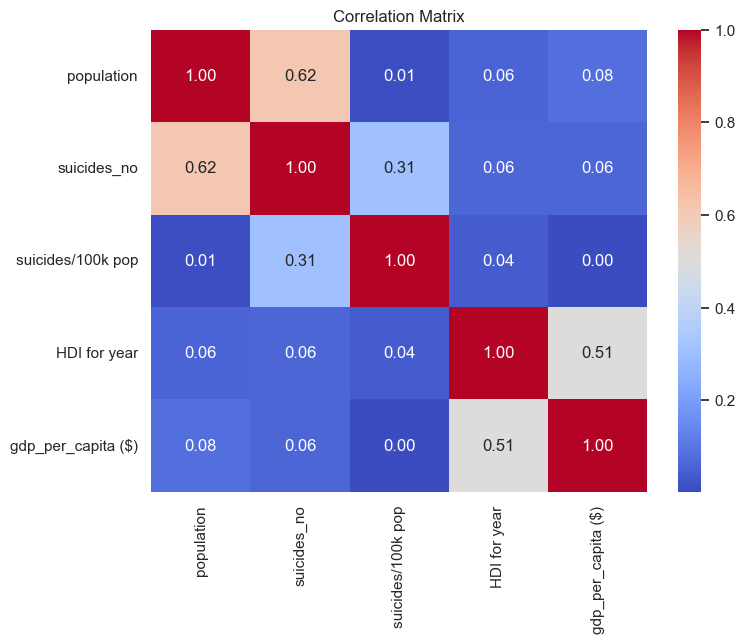

,population,suicides_no,suicides/100k pop,HDI for year,gdp_per_capita ($)
population,1.000000,0.616162,0.008285,0.057279,0.081510
suicides_no,0.616162,1.000000,0.306604,0.062669,0.061330
suicides/100k pop,0.008285,0.306604,1.000000,0.037290,0.001785
HDI for year,0.057279,0.062669,0.037290,1.000000,0.505505
gdp_per_capita ($),0.081510,0.061330,0.001785,0.505505,1.000000


In [13]:
# Select numerical columns for correlation
numerical_cols = ['population', 'suicides_no', 'suicides/100k pop', 'HDI for year', 'gdp_per_capita ($)']

# Calculate the correlation matrix
correlation_matrix = Suicide_data[numerical_cols].corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()
correlation_matrix


### Explanation:
The heatmap shows there is a positive correlation between the variables: population and suicide_no, gdp_per_capita ($) and HDI for year. 

**Suicide Number and Population:**
There's a moderate positive correlation (0.62) between the total number of suicides and the population size. This suggests that larger populations tend to have a higher number of suicides, which makes sense intuitively.   
Suicide Rate and GDP per Capita:

There's a very weak positive correlation (0.00) between the suicide rate and GDP per capita. This implies that GDP per capita doesn't have a significant impact on the suicide rate.  
**HDI and GDP per Capita:**

A moderate positive correlation (0.51) exists between HDI and GDP per capita. This suggests that countries with higher GDP per capita tend to have higher HDI, which is expected.     

**Suicide Rate and GDP per Capita:**  
There's a very weak positive correlation (0.00) between the suicide rate and GDP per capita. This implies that GDP per capita doesn't have a significant impact on the suicide rate.  

**Overall Insights**  

Population size seems to be a factor influencing the total number of suicides, but not the suicide rate when adjusted for population size.
The relationship between the suicide rate and socioeconomic factors like HDI and GDP per capita is very weak. This suggests that other factors beyond economic development might play a more significant role in suicide rates.


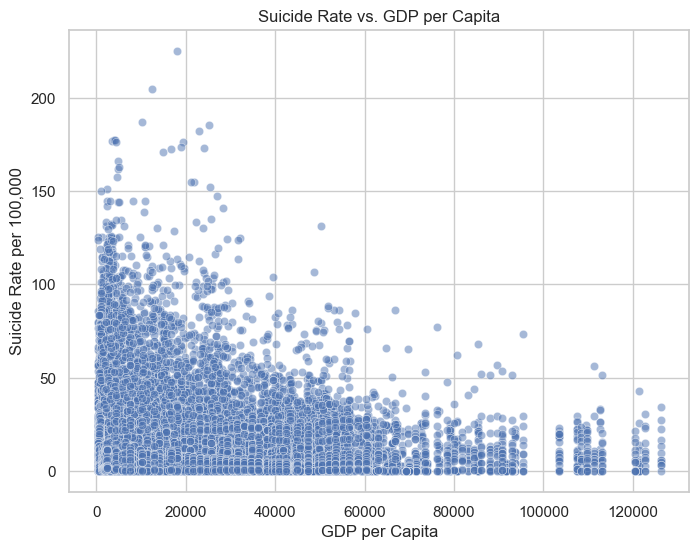

In [14]:
# Scatter plot of GDP per capita vs. suicide rate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=Suicide_data, x='gdp_per_capita ($)', y='suicides/100k pop', alpha=0.5)
plt.title("Suicide Rate vs. GDP per Capita")
plt.xlabel("GDP per Capita")
plt.ylabel("Suicide Rate per 100,000")
plt.show()

### Explanation of the Suicide rate scatter plot to GDP per Capital:
The visualizzation shows  the suicide rate per 100k is more frequent at people with low GDP per Capital. As the GDP increases the Suicide rate decreases that shows there is weak inverse correlation between suicide rate per 100k and GDP per Capital.